In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
#connects plotly to pandas

import cufflinks as cf
#make plotly work in your Notewook

from plotly.offline import download_plotlyjs,init_notebook_mode
, plot,iplot 
init_notebook_mode(connected=True)
cf.go_offline()
from pmdarima import auto_arima
from statsmodels.tsa.stattools import acovf,acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA,ARMA,ARMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR

In [25]:
gdp=pd.read_csv('https://raw.githubusercontent.com/derekbanas/TimeSeriesAnalysis/main/gdp-data.csv',index_col='date',parse_dates=True)

In [26]:
gdp.head()

,gdp,biz-apps,prod
date,,,
2004-09-30,12522.425,574777,89.09
2004-12-31,12761.337,583203,89.82
2005-03-31,12910.022,610664,89.53
2005-06-30,13142.873,618094,89.85
2005-09-30,13332.316,630382,90.22


In [27]:

def adf_test(timeseries):
    print ('Dickey-Fuller Test')
    # AIC aims to minimize corresponding information
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print (dfoutput)

In [28]:
from statsmodels.tsa.api import VAR

<AxesSubplot:xlabel='date'>

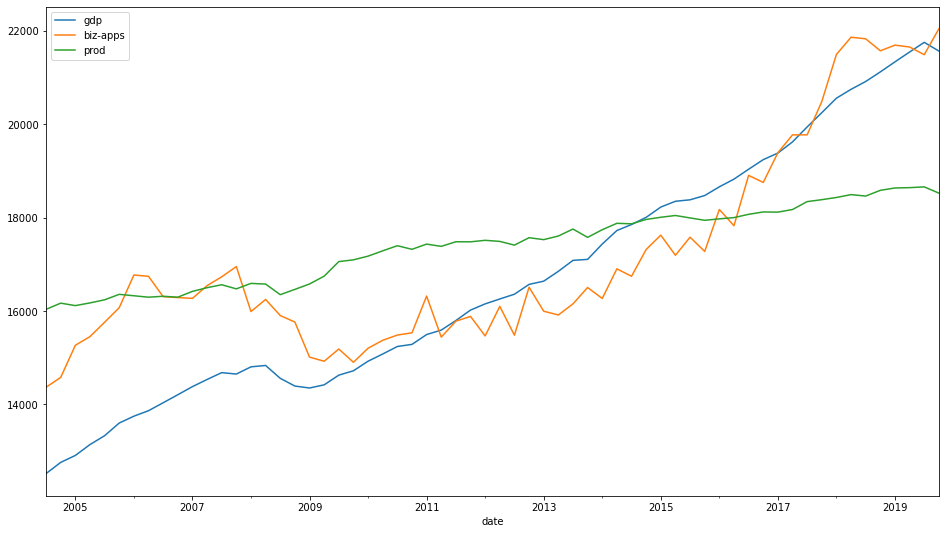

In [29]:
gdp=gdp[gdp.index<'2020-03-31']
gdp=gdp.dropna()
gdp=gdp.asfreq('Q')
ax=gdp['gdp'].plot(legend=True,figsize=(16,9))
gdp['biz-apps']=gdp['biz-apps']*.025
gdp['biz-apps'].plot(legend=True)
gdp['prod']=gdp['prod']*180
gdp['prod'].plot(legend=True)

In [30]:
gdp_diff=gdp.diff()

In [31]:
gdp_diff


,gdp,biz-apps,prod
date,,,
2004-09-30,NaN,NaN,NaN
2004-12-31,238.912,210.650,131.4
2005-03-31,148.685,686.525,-52.2
2005-06-30,232.851,185.750,57.6
2005-09-30,189.443,307.200,66.6
...,...,...,...
2018-12-31,205.456,-256.300,122.4
2019-03-31,214.568,120.575,50.4
2019-06-30,210.448,-39.700,7.2


In [34]:
gdp_diff=gdp_diff.dropna()
gdp_diff

,gdp,biz-apps,prod
date,,,
2004-12-31,238.912,210.650,131.4
2005-03-31,148.685,686.525,-52.2
2005-06-30,232.851,185.750,57.6
2005-09-30,189.443,307.200,66.6
2005-12-31,271.617,312.225,117.0
...,...,...,...
2018-12-31,205.456,-256.300,122.4
2019-03-31,214.568,120.575,50.4
2019-06-30,210.448,-39.700,7.2


<AxesSubplot:xlabel='date'>

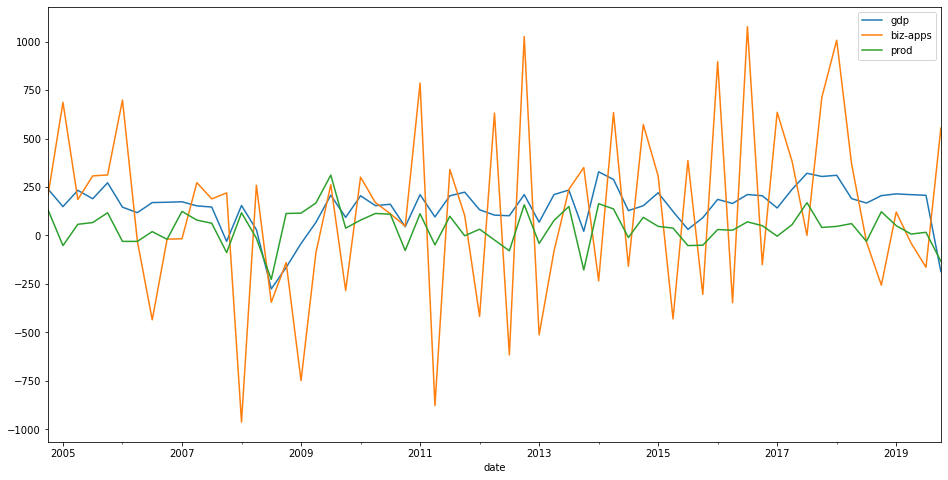

In [39]:
ax=gdp_diff['gdp'].plot(legend=True,figsize=(16,8))
gdp_diff['biz-apps'].plot(legend=True)
gdp_diff['prod'].plot(legend=True)

In [40]:
adf_test(gdp_diff['gdp'])
adf_test(gdp_diff['biz-apps'])
adf_test(gdp_diff['prod'])

Dickey-Fuller Test
Test Statistic                 -4.231840
p-value                         0.000582
#Lags Used                      0.000000
Number of Observations Used    60.000000
dtype: float64
Dickey-Fuller Test
Test Statistic                 -4.847785
p-value                         0.000044
#Lags Used                      1.000000
Number of Observations Used    59.000000
dtype: float64
Dickey-Fuller Test
Test Statistic                -8.342130e+00
p-value                        3.155371e-13
#Lags Used                     0.000000e+00
Number of Observations Used    6.000000e+01
dtype: float64


In [41]:
gdp_diff.size

183

In [42]:
train_df=gdp_diff[:146]
test_df=gdp_diff[146:]
mod=VAR(train_df)
for p in range(1,8):
    res=mod.fit(p)
    print(f'Order:{p}), AIC:{res.aic}')
res=mod.fit(1)
res.summary()

Order:1), AIC:29.430765695054937
Order:2), AIC:29.506892530237984
Order:3), AIC:29.574206262492705
Order:4), AIC:29.774732348897388
Order:5), AIC:29.82451544493759
Order:6), AIC:29.93452666608278
Order:7), AIC:29.995411157086068


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 31, Oct, 2021
Time:                     09:25:22
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    29.8496
Nobs:                     60.0000    HQIC:                   29.5946
Log likelihood:          -1126.33    FPE:                6.05170e+12
AIC:                      29.4308    Det(Omega_mle):     4.98644e+12
--------------------------------------------------------------------
Results for equation gdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              65.707462        24.205971            2.715           0.007
L1.gdp              0.634429         0.158564            4.001           0.000
L1.biz-apps        -0.010715         0.031128           -0.344        

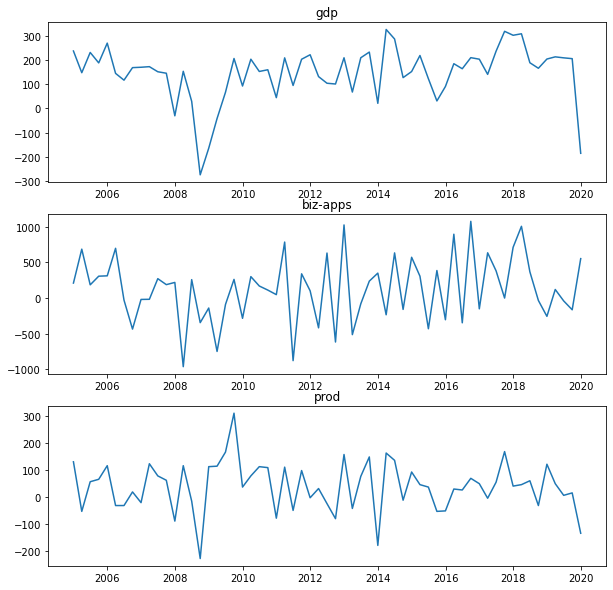

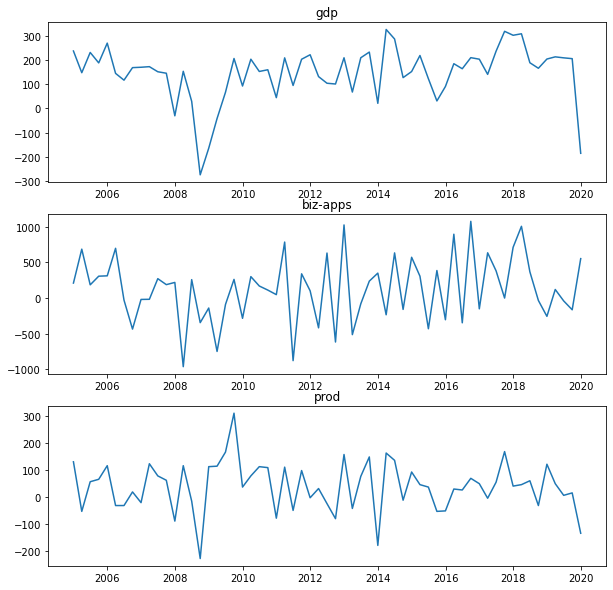

In [43]:
res.plot()

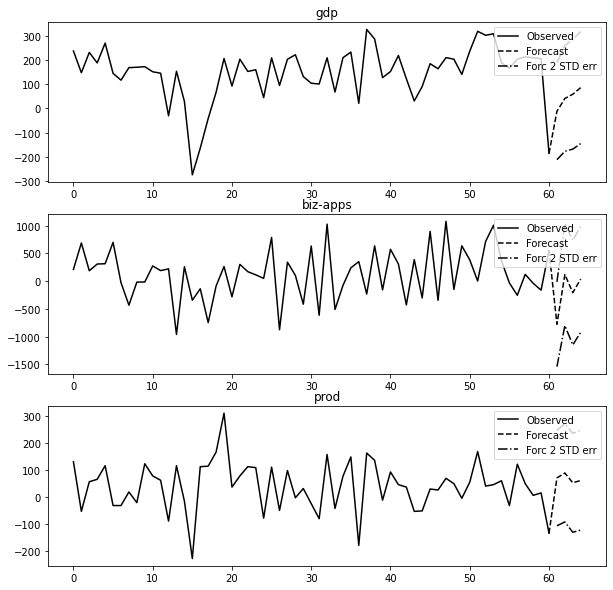

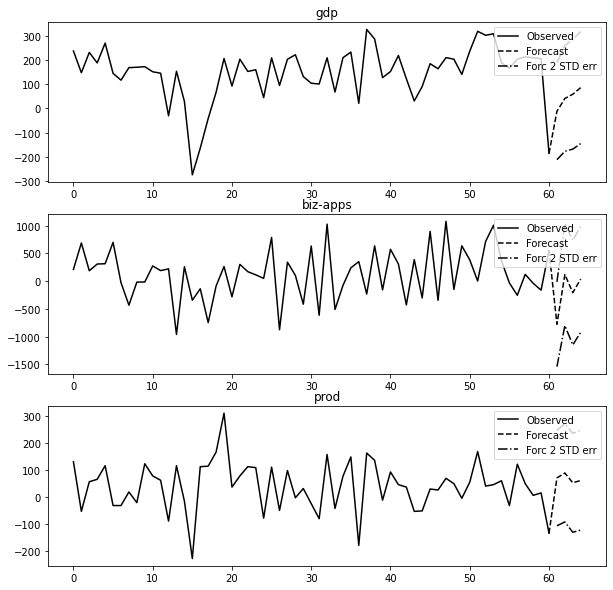

In [44]:
forecast_res=res.forecast(gdp_diff.values[-1:],4)
res.plot_forecast(4)

In [46]:
indx=pd.date_range('6/30/2020',periods=4,freq='Q-DEC')
forecast_df=pd.DataFrame(forecast_res,index=indx,
                        columns=['f-gdp','f-biz-apps','f-prod'])
forecast_df

,f-gdp,f-biz-apps,f-prod
2020-06-30,-11.649082,-779.058239,71.495463
2020-09-30,41.576289,118.196268,89.948953
2020-12-31,59.255006,-208.639970,53.757967
2021-03-31,86.672287,34.852294,62.252630


In [50]:
ex_df=pd.DataFrame({'A':np.random.randint(0,10,5)})
ex_df['B']=ex_df['A'].diff()
ex_df
x,x_diff=ex_df['A'].iloc[0],ex_df['B'].iloc[1:]
ex_df['C']=np.r[x,x_diff].cumsum.astype(float)
ex_df

AttributeError: module 'numpy' has no attribute 'r'

<AxesSubplot:>

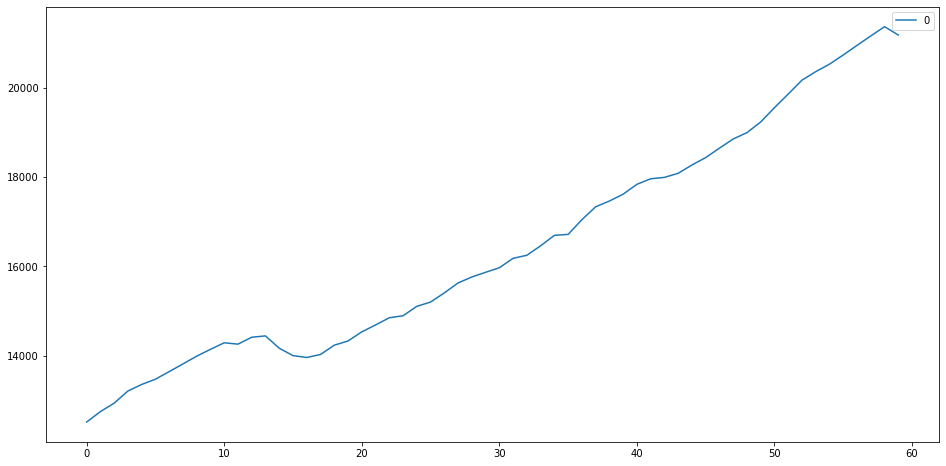

In [52]:
x,x_diff=gdp['gdp'].iloc[0],gdp_diff['gdp'].iloc[2:]
n_gdp_df=pd.DataFrame(np.r_[x,x_diff].cumsum().astype(float))
n_gdp_df.append(forecast_df['f-gdp'].cumsum())
n_gdp_df.plot(figsize=(16,8))